In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/EDA Data Upload/Scarped Zameen.com.xlsx - Sheet1.csv")

df

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,10 Marla Double Storey House Available For At...,https://www.zameen.com/Property/nowshera_armou...,Nowshera,House,10 Marla,PKR\n40 Thousand,For,"Armour Colony, Nowshera, Khyber Pakhtunkhwa",Malik Real Estate and Builders Take your pick ...,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18251,2 Marla Double Storey House For In Okara Shah...,https://www.zameen.com/Property/okara_shah_din...,Okara,House,2 Marla,PKR\n14 Thousand,For,"Shah Din Road, Okara, Punjab",NaN,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18252,8 Marla Single Story House Is Available For I...,https://www.zameen.com/Property/okara_umer_din...,Okara,House,8 Marla,PKR\n40 Thousand,For,"Umer Din Town, Okara, Punjab",8 Marla Single Story House Is Available For I...,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18253,Beautiful House For In Attock Cantt,https://www.zameen.com/Property/attock_cantt_b...,Attock,House,1 Kanal,PKR\n1 Lakh,For,"Cantt, Attock, Punjab",NaN,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Info**

In [ ]:
df_info = df.info()
df_head = df.head()
df_shape = df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12  Central Air Condit

**Data Understanding & Preprocessing**

In [ ]:
#Removing those columns where all values are null

df_cleaned = df.dropna(axis=1, how='all')

# Show the remaining columns
print("Remaining columns after dropping empty ones:")
print(df_cleaned.columns.tolist())


Remaining columns after dropping empty ones:
['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location', 'Description', 'Built in year', 'Parking Spaces', 'Floors', 'Bedrooms', 'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms']


In [ ]:
# Check how many rows are duplicates
duplicate_count = df_cleaned.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Confirm new shape
print(f"New shape after removing duplicates: {df_cleaned.shape}")

Duplicate rows found: 0
New shape after removing duplicates: (18255, 17)


In [ ]:
import re
import numpy as np

# Function to clean and convert price into PKR
def clean_price(price):
    if pd.isnull(price):
        return np.nan
    price = price.replace("PKR", "").replace("\n", "").replace(",", "").strip().lower()
    if 'crore' in price:
        return float(re.findall(r'\d+\.?\d*', price)[0]) * 10000000
    elif 'lakh' in price:
        return float(re.findall(r'\d+\.?\d*', price)[0]) * 100000
    else:
        try:
            return float(price)
        except:
            return np.nan

# Apply the function to create a clean numeric price column
df_cleaned['Price_Cleaned'] = df_cleaned['Price'].apply(clean_price)

# Show cleaned prices
df_cleaned[['Price', 'Price_Cleaned']].head()


,Price,Price_Cleaned
0,PKR\n4.75 Crore,47500000.0
1,PKR\n6.25 Crore,62500000.0
2,PKR\n3.45 Crore,34500000.0
3,PKR\n2.98 Crore,29800000.0
4,PKR\n4.65 Crore,46500000.0


In [ ]:
# Function to convert different area units into square feet
def convert_area_to_sqft(area_str):
    if pd.isnull(area_str):
        return np.nan
    try:
        area_str = area_str.strip().lower()
        value = float(re.findall(r'\d+\.?\d*', area_str)[0])
        if 'sq. yd' in area_str:
            return value * 9
        elif 'marla' in area_str:
            return value * 225
        elif 'kanal' in area_str:
            return value * 4500
        elif 'sqft' in area_str or 'sq. ft' in area_str:
            return value
        else:
            return np.nan
    except:
        return np.nan

# Apply the conversion
df_cleaned['Area_Sqft'] = df_cleaned['Area'].apply(convert_area_to_sqft)

# Check the result
df_cleaned[['Area', 'Area_Sqft']].head()


,Area,Area_Sqft
0,128 Sq. Yd.,1152.0
1,161 Sq. Yd.,1449.0
2,111 Sq. Yd.,999.0
3,106 Sq. Yd.,954.0
4,156 Sq. Yd.,1404.0


In [ ]:
# Function to extract number from string
def extract_number(val):
    try:
        return float(re.findall(r'\d+\.?\d*', str(val))[0])
    except:
        return np.nan

# Apply the function
df_cleaned['Bedrooms_Num'] = df_cleaned['Bedrooms'].apply(extract_number)
df_cleaned['Bathrooms_Num'] = df_cleaned['Bathrooms'].apply(extract_number)

# Check result
df_cleaned[['Bedrooms', 'Bedrooms_Num', 'Bathrooms', 'Bathrooms_Num']].head()


,Bedrooms,Bedrooms_Num,Bathrooms,Bathrooms_Num
0,2,2.0,2,2.0
1,2,2.0,3,3.0
2,1,1.0,2,2.0
3,1,1.0,2,2.0
4,2,2.0,2,2.0


In [ ]:
# Drop rows where Price, Area or Type is missing (can't be imputed reliably)
df_cleaned = df_cleaned.dropna(subset=['Price_Cleaned', 'Area_Sqft', 'Type'])

# Print new shape
print(f"Shape after dropping rows with missing target/critical values: {df_cleaned.shape}")


Shape after dropping rows with missing target/critical values: (14668, 21)


**Missing Values Treatment**

In [ ]:
# Fill missing bedrooms using median value grouped by property type
df_cleaned['Bedrooms_Num'] = df_cleaned.groupby('Type')['Bedrooms_Num'].transform(
    lambda x: x.fillna(x.median()))

# Fill missing bathrooms using median value grouped by property type
df_cleaned['Bathrooms_Num'] = df_cleaned.groupby('Type')['Bathrooms_Num'].transform(
    lambda x: x.fillna(x.median()))


In [ ]:
# Check for any remaining missing values in key columns
missing_final = df_cleaned[['Price_Cleaned', 'Area_Sqft', 'Bedrooms_Num', 'Bathrooms_Num', 'Type']].isnull().sum()
print("Remaining missing values:\n", missing_final)


Remaining missing values:
 Price_Cleaned    0
Area_Sqft        0
Bedrooms_Num     0
Bathrooms_Num    0
Type             0
dtype: int64


**Standardize Names Using Fuzzy Matching**

In [ ]:
!pip install fuzzywuzzy[speedup]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.7 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import process


In [ ]:
# Get unique city names
unique_cities = df_cleaned['City'].unique()

# Function to match similar names to a standard list
def standardize_city(city, reference_list):
    match, score = process.extractOne(city, reference_list)
    return match if score >= 90 else city

# Build reference list from most frequent cities
top_cities = df_cleaned['City'].value_counts().head(20).index.tolist()

# Apply standardization
df_cleaned['City_Standard'] = df_cleaned['City'].apply(lambda x: standardize_city(x, top_cities))

# View original vs cleaned city names
df_cleaned[['City', 'City_Standard']].drop_duplicates().head(10)

,City,City_Standard
0,Karachi,Karachi
1248,Islamabad,Islamabad
2490,Faisalabad,Faisalabad
3730,Multan,Multan
4944,Rawalpindi,Rawalpindi
6192,Peshawar,Peshawar
7048,Jhelum,Jhelum
7183,Murree,Murree
7288,Hyderabad,Hyderabad
7553,Bahawalpur,Bahawalpur


In [ ]:
# Convert all property types to lowercase and strip spaces
df_cleaned['Type_Cleaned'] = df_cleaned['Type'].str.strip().str.lower()

# Map variations to standardized types
type_mapping = {
    'flat': 'Apartment',
    'apartment': 'Apartment',
    'house': 'House',
    'upper portion': 'Portion',
    'lower portion': 'Portion',
    'portion': 'Portion',
    'penthouse': 'Penthouse',
    'room': 'Room',
    'farm house': 'Farmhouse',
    'villa': 'Villa',
    'office': 'Commercial',
    'shop': 'Commercial',
    'plaza': 'Commercial',
    'warehouse': 'Commercial',
    'factory': 'Commercial',
}

df_cleaned['Type_Standard'] = df_cleaned['Type_Cleaned'].map(type_mapping).fillna('Other')

# View counts of cleaned types
df_cleaned['Type_Standard'].value_counts()


,count
Type_Standard,
House,11988
Apartment,1924
Portion,654
Farmhouse,74
Penthouse,21
Room,7


In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers for Price and Area
df_cleaned = remove_outliers_iqr(df_cleaned, 'Price_Cleaned')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Area_Sqft')

# Final shape after outlier removal
print(f"Dataset shape after outlier removal: {df_cleaned.shape}")


Dataset shape after outlier removal: (11036, 24)


**Feature Engineering**


In [ ]:
# Calculate price per square foot
df_cleaned['Price_per_sqft'] = df_cleaned['Price_Cleaned'] / df_cleaned['Area_Sqft']

# Preview
df_cleaned[['City_Standard', 'Price_Cleaned', 'Area_Sqft', 'Price_per_sqft']].head()


,City_Standard,Price_Cleaned,Area_Sqft,Price_per_sqft
0,Karachi,47500000.0,1152.0,41232.638889
1,Karachi,62500000.0,1449.0,43133.195307
2,Karachi,34500000.0,999.0,34534.534535
3,Karachi,29800000.0,954.0,31236.897275
4,Karachi,46500000.0,1404.0,33119.658120


In [ ]:
from datetime import datetime

# Define current year
current_year = datetime.now().year

# Create property age feature
df_cleaned['Property_Age'] = current_year - df_cleaned['Built in year']

# Replace unreasonable ages (e.g. built in future or 100 years ago) with NaN
df_cleaned['Property_Age'] = df_cleaned['Property_Age'].apply(
    lambda x: x if 0 < x < 100 else np.nan
)

# Preview
df_cleaned[['Built in year', 'Property_Age']].dropna().head()


,Built in year,Property_Age
5,2024.0,1.0
6,2008.0,17.0
12,2015.0,10.0
14,2013.0,12.0
17,2024.0,1.0


In [ ]:
# Total rooms = bedrooms + bathrooms
df_cleaned['Total_Rooms'] = df_cleaned['Bedrooms_Num'] + df_cleaned['Bathrooms_Num']

# Preview
df_cleaned[['Bedrooms_Num', 'Bathrooms_Num', 'Total_Rooms']].head()


,Bedrooms_Num,Bathrooms_Num,Total_Rooms
0,2.0,2.0,4.0
1,2.0,3.0,5.0
2,1.0,2.0,3.0
3,1.0,2.0,3.0
4,2.0,2.0,4.0


In [ ]:
df_cleaned[['Price_per_sqft', 'Property_Age', 'Total_Rooms']].describe()


,Price_per_sqft,Property_Age,Total_Rooms
count,1.103600e+04,4611.000000,11036.000000
mean,inf,4.072435,8.628489
std,NaN,5.032730,2.870010
min,2.777778e+01,1.000000,2.000000
25%,1.029765e+04,1.000000,7.000000
50%,1.522254e+04,2.000000,9.000000
75%,1.919192e+04,5.000000,11.000000
max,inf,45.000000,21.000000


**Univariate & Bivariate Analysis**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

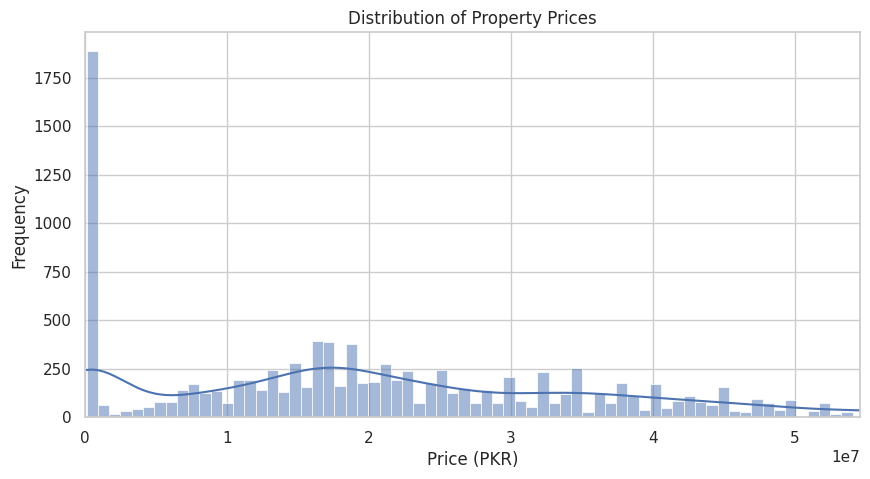

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Price_Cleaned'], bins=100, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (PKR)')
plt.ylabel('Frequency')
plt.xlim(0, df_cleaned['Price_Cleaned'].quantile(0.95))  # zoom in to 95th percentile
plt.show()


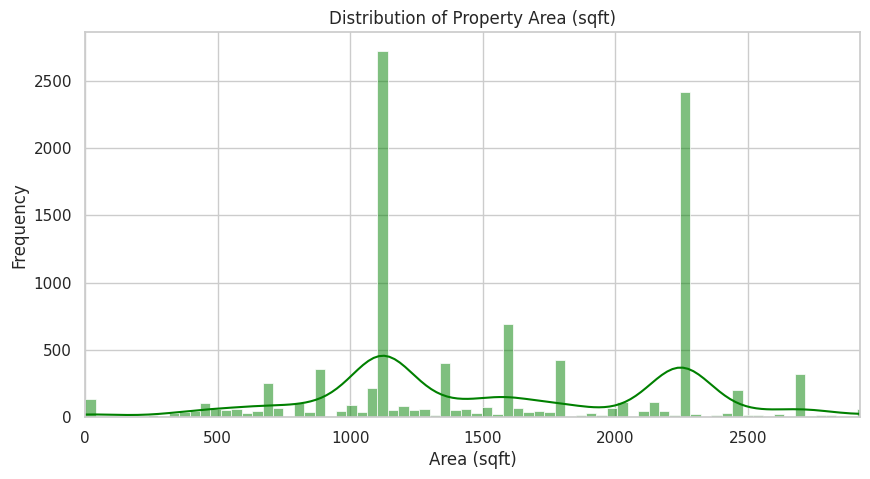

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Area_Sqft'], bins=100, kde=True, color='green')
plt.title('Distribution of Property Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Frequency')
plt.xlim(0, df_cleaned['Area_Sqft'].quantile(0.95))  # zoom in
plt.show()


/tmp/ipython-input-43-4169693754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bedrooms_Num', data=df_cleaned, palette='coolwarm')


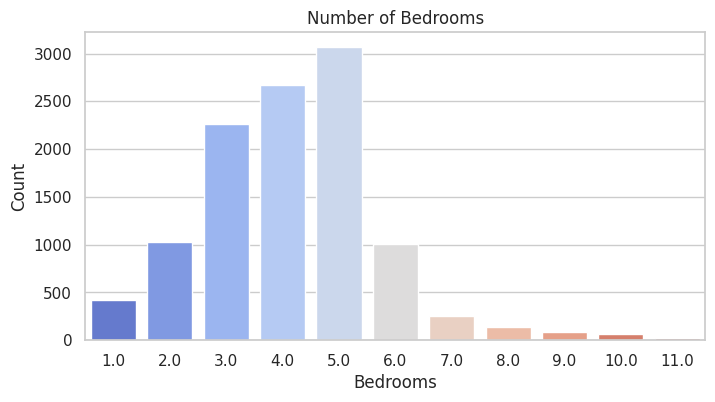

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Bedrooms_Num', data=df_cleaned, palette='coolwarm')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-44-3127204849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_price.index, y=city_avg_price.values, palette='viridis')


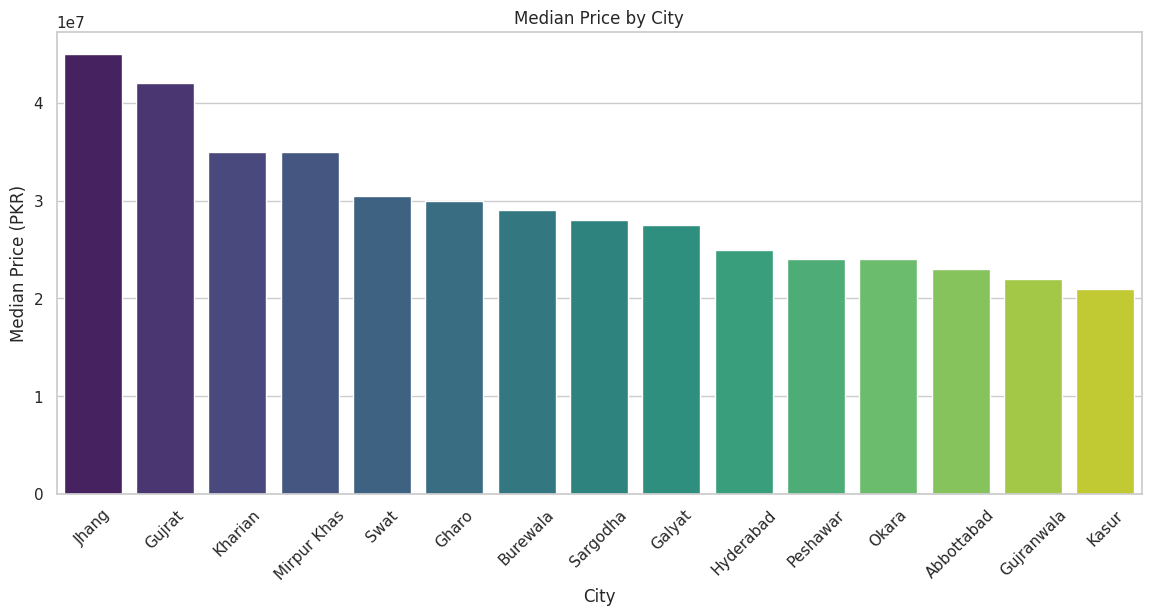

In [ ]:
plt.figure(figsize=(14, 6))
city_avg_price = df_cleaned.groupby('City_Standard')['Price_Cleaned'].median().sort_values(ascending=False).head(15)
sns.barplot(x=city_avg_price.index, y=city_avg_price.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Median Price by City')
plt.ylabel('Median Price (PKR)')
plt.xlabel('City')
plt.show()


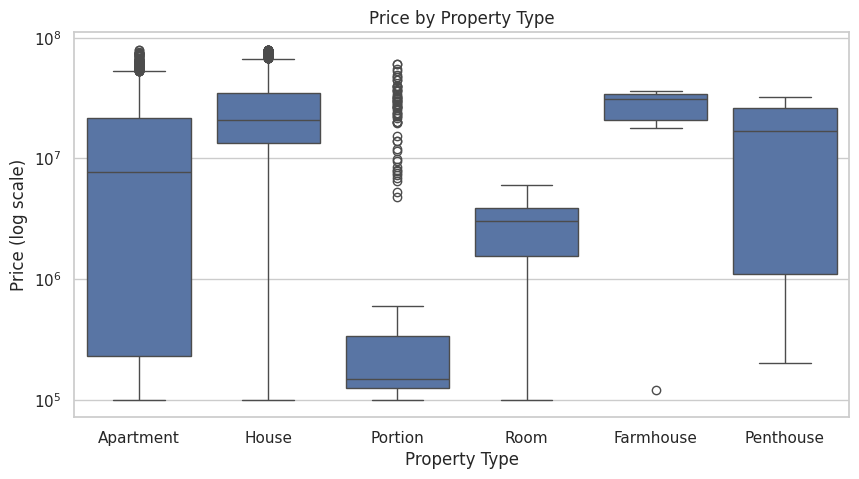

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Type_Standard', y='Price_Cleaned', data=df_cleaned)
plt.title('Price by Property Type')
plt.yscale('log')  # Prices vary widely, use log scale
plt.xlabel('Property Type')
plt.ylabel('Price (log scale)')
plt.show()


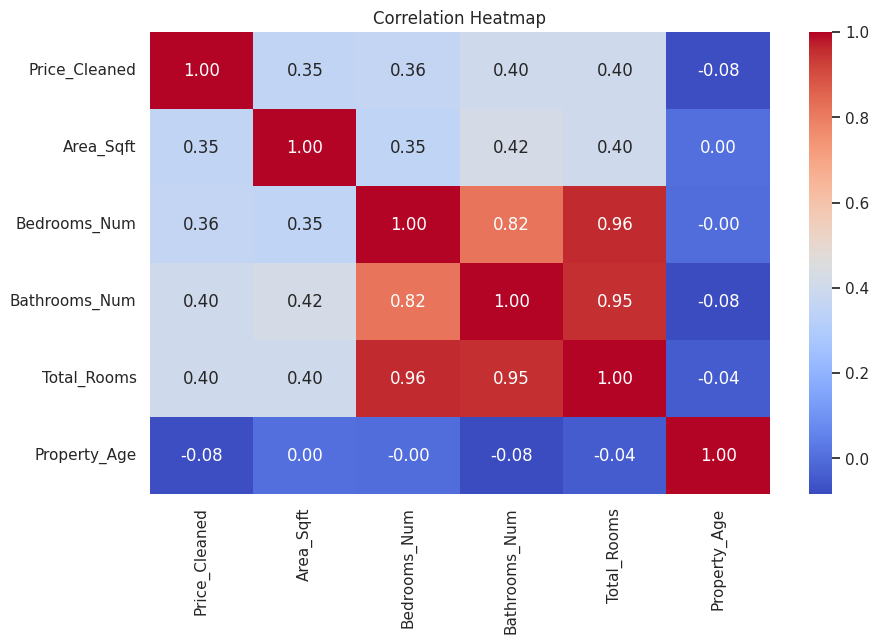

In [ ]:
# Select numerical features
num_features = ['Price_Cleaned', 'Area_Sqft', 'Bedrooms_Num', 'Bathrooms_Num', 'Total_Rooms', 'Property_Age']

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


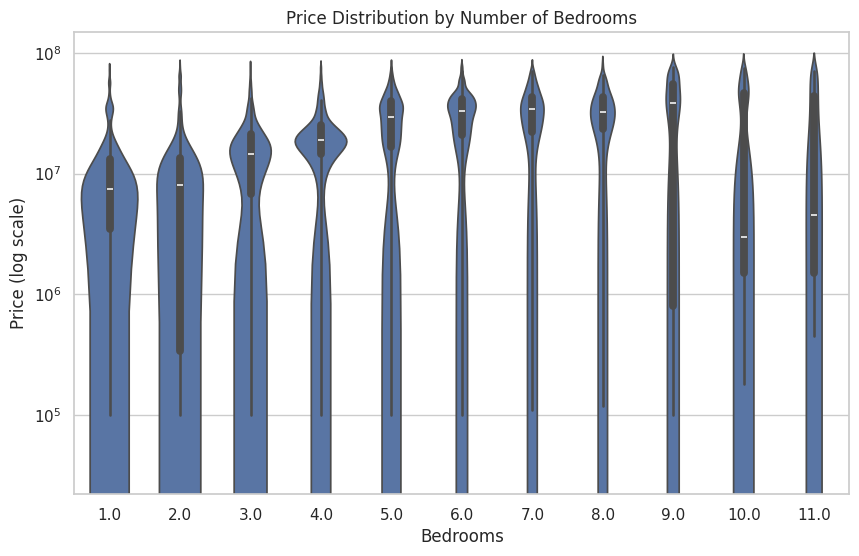

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Bedrooms_Num', y='Price_Cleaned', data=df_cleaned)
plt.yscale('log')  # Log scale for better visualization
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (log scale)')
plt.show()
